In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\Priyansh Mishra\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Priyansh Mishra\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Priyansh Mishra\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Priyansh Mishra\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
production=pd.read_csv("c:\\Users\\Priyansh Mishra\\SIH\\crop production.csv")
production.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
production.shape

(246091, 7)

In [7]:
production.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [8]:
#divide into depemdent and independent
x=production.iloc[:, -1]
y=production.iloc[:, 6]  #dependent

In [9]:
production.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [11]:
production.replace("",np.nan,inplace=True)
new=production[(production.Production.isnull())].reset_index()
new.head()
# we replaced empty values by nan

,index,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
1,51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
2,623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
3,630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
4,698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN


In [12]:
new.shape

(3730, 8)

In [13]:
array_new=new.iloc[:,:].values
array_prod=production.iloc[:,:].values

In [15]:
meandf=production.groupby(['State_Name','Crop']).mean()[('Production')].reset_index()
meandf.head()

,State_Name,Crop,Production
0,Andaman and Nicobar Islands,Arecanut,2825.635882
1,Andaman and Nicobar Islands,Arhar/Tur,52.000000
2,Andaman and Nicobar Islands,Banana,6089.040625
3,Andaman and Nicobar Islands,Black pepper,51.750000
4,Andaman and Nicobar Islands,Cashewnut,93.599444


In [17]:
for i in range(len(new)):
    s=array_new[i,1]
    c=array_new[i,5]
    array_new[i,7]=meandf[(meandf.State_Name==s)&(meandf.Crop==c)].iloc[:,-1].values[0]

df=pd.DataFrame(data=array_new)
df.head()

,0,1,2,3,4,5,6,7
0,46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,2825.64
1,51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17,309.1
2,623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000,2989.63
3,630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000,1248.04
4,698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8,876.721


Now we take nan values and replace them with the mean of production of that crop and the state for which the production values is not available(by group acc to state and crop and then replacing the missing value with its corrosponding group mean)

In [27]:
for i in range(len(array_new)):
    index=array_new[i,0]
    array_prod[index,-1]=array_new[i,7]
    
a=production.columns.values
map={0:a[0],1:a[1],2:a[2],3:a[3],4:a[4],5:a[5],6:a[6]}

pro=pd.DataFrame(data=array_prod)
pro.rename(map,axis=1,copy=True,inplace=True)

In [30]:
pro.isna().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       238
dtype: int64

In [31]:
#searchig for duplicate values and then removing them
dup=pro[pro.duplicated(subset=None,keep=False)]
dup

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


In [33]:
# no duplicate  value so nothing is removed
display(production.describe())

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [34]:
catagorical=list(production.select_dtypes(include=['object']).columns.values)
catagorical

['State_Name', 'District_Name', 'Season', 'Crop']

In [36]:
# we have to chane these catagorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in range(0,len(catagorical)):
    production[catagorical[i]]=le.fit_transform(production[catagorical[i]])
production.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0


In [44]:
# it encoded as Kharif=1 and Rabi=2 but when we compare (for ex:- 2>1 means Rabi has higher value then Kharif) also we have state are numbered 1,2,.. so we cannot compare states to avoid such confusions we use dummy variable
dummy= pd.get_dummies(production)
dummy.shape

(246091, 7)

In [45]:
dummy.columns.values

array(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area', 'Production'], dtype=object)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(production.iloc[ : ,: -1],production.iloc[:,6],test_size=0.3,random_state=0)

In [50]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(172263, 6) (73828, 6) (172263,) (73828,)


In [51]:
#here we splited the dataset in 70:30 ratio for training and testing data

Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
ds=pd.DataFrame(data=std.fit_transform(production))
ds.head()

C:\Users\Priyansh Mishra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Priyansh Mishra\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6
0,-1.751735,0.616945,-1.139508,-0.909326,-1.950001,-0.212750,-0.034016
1,-1.751735,0.616945,-1.139508,-0.909326,0.163424,-0.237530,-0.034133
2,-1.751735,0.616945,-1.139508,-0.909326,0.779839,-0.235551,-0.034114
3,-1.751735,0.616945,-1.139508,1.422761,-1.803236,-0.234086,-0.034095
4,-1.751735,0.616945,-1.139508,1.422761,-1.362939,-0.223319,-0.034123


In [67]:
pie=production[(production.State_Name=='Karnatka')&(production.Crop_Year==2014)]
pie=pie.groupby('Crop').sum()[['Area']].reset_index()
Area=pie['Area'].values
Crop=pie['Crop'].values
pie.head()

1.16.2


C:\Users\Priyansh Mishra\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Crop,Area


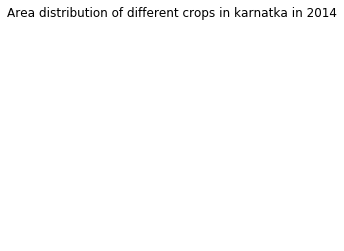

In [58]:
Karnatka14=plt.pie(Area,labels=Crop,autopct='%2.2%%',radius=3.0,pctdistance=0.9)
t=plt.title('Area distribution of different crops in karnatka in 2014')

In [60]:
pie=production[(production.State_Name=='Karnatka')&(production.Crop_Year==2010)]
pie=pie.groupby('Crop').sum()[['Area']].reset_index()
Area=pie['Area'].values
Crop=pie['Crop'].values
pie.head()

C:\Users\Priyansh Mishra\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Crop,Area


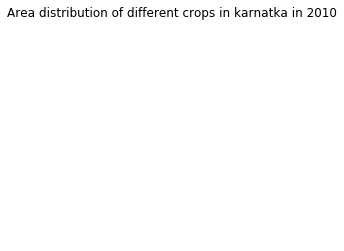

In [61]:
Karnatka10=plt.pie(Area,labels=Crop,autopct='%2.2%%',radius=3.0,pctdistance=0.9)
t=plt.title('Area distribution of different crops in karnatka in 2010')

In [62]:
punjab09=production[(production.Crop_Year==2009)&(production.State_Name=='Punjab')]
sns.boxplot(x='Crop_Year',y='Production',hue='Season',data=punjab09,fliersize=2)
t=plt.title('Yeaarwise Production in different seasons of Punjab')

C:\Users\Priyansh Mishra\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: min() arg is an empty sequence

In [69]:
guj=production[(production.State_Name=='Gujrat')]
ds=Production=guj.group_by('Crop').sum()[['Production']].reset_index()
names=ds.Crop.values
y_pos=np.arange(len(names))
ds

C:\Users\Priyansh Mishra\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


AttributeError: 'DataFrame' object has no attribute 'group_by'

NameError: name 'y_pos' is not defined

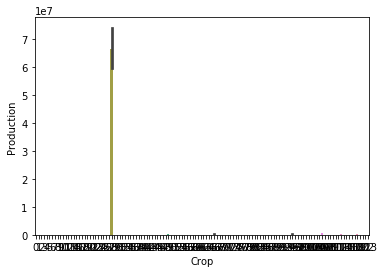

In [66]:
sns.barplot(x=production['Crop'],y=production['Production'],data=ds)
plt.xticks(y_pos,names,rotation=90)
t=plt.title('Total production of different crops in Gujrat')

In [ ]:
sns.barplot(x=production['Crop'],y=production['Production'],data=ds)
plt.xticks(y_pos,names,rotation=90)
t=plt.title('Total production of different crops in Gujrat')